In [1]:
import torch
import torchvision
from torch.utils.data import DataLoader, Dataset
from torchvision import transforms
from torch.autograd import Variable
from torch import optim
import torch.nn as nn
import torch.nn.functional as F
import os
import cv2
from PIL import Image
from tqdm import tqdm_notebook as tqdm
import random
from matplotlib import pyplot as plt
import torchvision.transforms as transforms
import torchvision.models as models
from torch.utils.data import Dataset, DataLoader
import csv

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
# device = torch.device('mps:0')

In [2]:
class CustomDataset(Dataset):
    def __init__(self, data_list, transform=None):
        self.data_list = data_list

    def __len__(self):
        return len(self.data_list)

    def __getitem__(self, idx):
        data = self.data_list[idx]
        graph = data['graph']
        label = data['label']
        code = data['code']

        return code, graph, label

In [3]:
csv_file_path = '/Users/parkjeonghoon/Desktop/BITamin/project_data/list.csv' # 코드만 따로 뽑아서 csv 파일 만들어야 함.

code_set = []
with open(csv_file_path, 'r') as csv_file:
    csv_reader = csv.reader(csv_file)
    for row in csv_reader:
        code_set.append(row[0]) # row는 손 봐야 함.

dic_path = '/Users/parkjeonghoon/Desktop/BITamin/project_data/test_torch'
test_list = os.listdir(dic_path)
test_list = [filename.split('.')[0] for filename in test_list]

# 데이터 파일들의 경로 리스트 (각 회사별 데이터 경로)
data_files = []
test_files = []

for code in code_set:
    data_files.append(f'{code}')

for code_t in test_list:
    test_files.append(f'{code_t}')

print(test_files)

# 데이터를 저장할 리스트
dataset = []
test_dataset = []

test_files.remove('')

# 각 데이터 파일을 로드하여 데이터셋에 추가
for file_code in data_files:
    file_path = f'/Users/parkjeonghoon/Desktop/BITamin/project_data/torch/{file_code}.pt'
    data = torch.load(file_path)  # .pt 파일 로드
    data['code'] = f'{file_code}'
    dataset.append(data)

for test_code in test_files:
    file_test_path = f'/Users/parkjeonghoon/Desktop/BITamin/project_data/test_torch/{test_code}.pt'
    print(test_code)
    print(file_test_path)
    test = torch.load(file_test_path)  # .pt 파일 로드
    test['code'] = f'{test_code}'
    test_dataset.append(test)

print(len(test_files))
# CustomDataset 클래스를 사용하여 데이터셋 생성
train_set = CustomDataset(dataset)
valid_set = CustomDataset(test_dataset)

# 데이터로더 생성
batch_size = 4
train_loader = DataLoader(train_set, batch_size=batch_size, shuffle=True)
valid_loader = DataLoader(valid_set, batch_size= batch_size, shuffle=False)


['251960_test', '057500_test', '', '071050_test', '004990_test', '112610_test', '052690_test', '284610_test', '228180_test', '272210_test', '001450_test', '267260_test', '111770_test', '004370_test', '152330_test', '065940_test', '271780_test', '282330_test', '204990_test', '277480_test', '194510_test']
251960_test
/Users/parkjeonghoon/Desktop/BITamin/project_data/test_torch/251960_test.pt
057500_test
/Users/parkjeonghoon/Desktop/BITamin/project_data/test_torch/057500_test.pt
071050_test
/Users/parkjeonghoon/Desktop/BITamin/project_data/test_torch/071050_test.pt
004990_test
/Users/parkjeonghoon/Desktop/BITamin/project_data/test_torch/004990_test.pt
112610_test
/Users/parkjeonghoon/Desktop/BITamin/project_data/test_torch/112610_test.pt
052690_test
/Users/parkjeonghoon/Desktop/BITamin/project_data/test_torch/052690_test.pt
284610_test
/Users/parkjeonghoon/Desktop/BITamin/project_data/test_torch/284610_test.pt
228180_test
/Users/parkjeonghoon/Desktop/BITamin/project_data/test_torch/228180

In [4]:
print(len(code_set))

240


In [5]:
RESNET = models.resnet18(pretrained = True)

/Users/parkjeonghoon/miniconda3/envs/torch/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/Users/parkjeonghoon/miniconda3/envs/torch/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [6]:
print(RESNET)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [7]:
num_features = RESNET.fc.out_features
# RESNET.fc =  nn.Sequential(
#    nn.Linear(512, 1),
#    nn.ReLU(inplace = True)
#)
# RESNET.fc = nn.Sequential(
#    nn.Linear(512, 64),
#    nn.ELU(inplace = True),
#    nn.Linear(64, 1)
#)
RESNET.fc = nn.Linear(512, 1)
print(RESNET)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [8]:
for param in RESNET.parameters():
    param.requires_grad = False

In [9]:
for param in RESNET.layer4.parameters():
    param.requires_grad = True

for param in RESNET.fc.parameters():
    param.requires_grad = True

In [10]:
learning_rate = 0.001
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(RESNET.parameters(), lr = learning_rate)

In [15]:
from torch.autograd import Variable

epochs = 4
predictions_list = []
labels_list = []
num_epoch = 0
epoch_list = []
accuracy_list = []
loss_list = []

for epoch in range(epochs):
    print("\nEpoch ", epoch+1)
    # train
    print("\nTrain:")
    ave_loss = 0
    cnt = 0
    for batch, data in enumerate(train_loader):

        code, inputs, labels = data
        inputs = inputs.to(device)
        labels = labels.to(device)
        
        inputs = Variable(inputs.view(4, 3, 480, 640))
        labels = Variable(labels)
        
        outputs = RESNET(inputs)
        outputs[outputs >= 0.5] = 1.0
        outputs[outputs < 0.5] = 0.0
        loss = criterion(outputs.reshape(4), labels.float())
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        cnt = cnt + 1
        if cnt % 100 == 0:
            print('current_loss = ', loss.item())
        ave_loss += loss.item() / len(train_loader)
    loss_list.append(ave_loss)
        
    num_epoch += 1
    print("# epoch = {}, loss : {}, Accuracy: None %".format(num_epoch, ave_loss))
    

    total = 0
    correct = 0
    print("\nValidation")
    for batch, data in enumerate(valid_loader):
        
        code, input, label = data
        input = input.to(device)
        label = label.to(device)
        
        input = Variable(input.view(4, 3, 480, 640))
        label = Variable(label)
        
        labels_list.append(label)
        pred = RESNET(inputs)
        pred = pred.reshape(4)
        pred[pred >= 0.5] = 1
        pred[pred < 0.5] = 0
        correct += pred.eq(labels.cpu().int()).sum()
        total += len(label)
    accuracy = correct * 100 / total
    epoch_list.append(num_epoch)
    accuracy_list.append(accuracy)
    print("# epoch = {}, loss : None, Accuracy: {} %".format(num_epoch, accuracy))

path = '/Users/parkjeonghoon/Desktop/BITamin/project_data/resnet_model_cnn'
torch.save(RESNET, path)




Epoch  1

Train:
# epoch = 1, loss : 2.349074850479763, Accuracy: None %

Validation
# epoch = 1, loss : None, Accuracy: 50.0 %

Epoch  2

Train:
# epoch = 2, loss : 2.3723491549491897, Accuracy: None %

Validation
# epoch = 2, loss : None, Accuracy: 100.0 %

Epoch  3

Train:
# epoch = 3, loss : 2.3018991986910513, Accuracy: None %

Validation
# epoch = 3, loss : None, Accuracy: 100.0 %

Epoch  4

Train:
# epoch = 4, loss : 2.2983695169289913, Accuracy: None %

Validation
# epoch = 4, loss : None, Accuracy: 100.0 %


In [16]:
path = '/Users/parkjeonghoon/Desktop/BITamin/project_data/resnet_model_cnn.pt'
torch.save(RESNET, path)

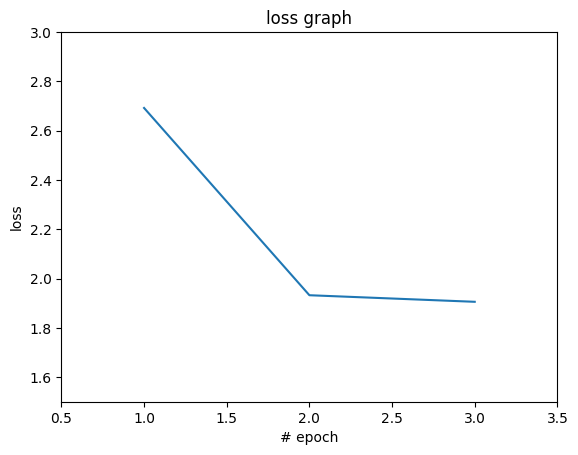

In [104]:
plt.plot([1, 2, 3], loss_list)
plt.title('loss graph')
plt.xlabel('# epoch')
plt.ylabel('loss')
plt.xlim([0.5, 3.5])
plt.ylim([1.5, 3])
plt.show()

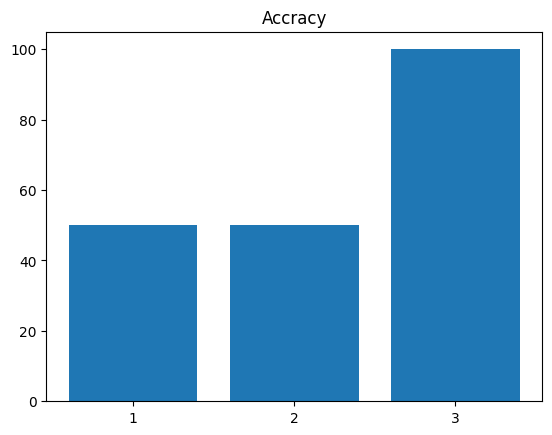

In [111]:
x = [1, 2, 3]
plt.bar(x, accuracy_list)
plt.title('Accracy')
plt.xticks(x, x)
plt.show()